In [1]:
# import necessary packages
import pandas as pd 
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import dataset
fraud_d = pd.read_csv(r"C:\Users\ADITYA\Desktop\New folder AS\Practice_Assignments-main\Random Forest\Fraud_check.csv")
fraud_d.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
# Renamning the data
data2 = fraud_d.rename({'Marital.Status':'Maritial_status','Taxable.Income':'Taxable_income','City.Population':'City_population','Work.Experience':'Work_experience'},axis = 1)
data2

,Undergrad,Maritial_status,Taxable_income,City_population,Work_experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
# converting the catogotical data into numerical 
data2['Undergrad'] = data2['Undergrad'].map({'NO':0,'YES':1})
data2['Maritial_status'] = data2['Maritial_status'].map({'Single':1,'Divorced':0,'Married':2})
data2['Urban'] = data2['Urban'].map({'YES':1,'NO':0})

In [5]:
data2

,Undergrad,Maritial_status,Taxable_income,City_population,Work_experience,Urban
0,0,1,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,2,36925,160205,30,1
3,1,1,50190,193264,15,1
4,0,2,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,2,98592,180083,17,0


In [6]:
# convering the catogorical data to numeric data according to problem statement
data2["taxable_income"]="GOOD"
data2.loc[data2["Taxable_income"]<=30000,"taxable_income"]="Risky"
data2.drop(['Taxable_income'],axis = 1,inplace = True)

In [7]:
data2

,Undergrad,Maritial_status,City_population,Work_experience,Urban,taxable_income
0,0,1,50047,10,1,GOOD
1,1,0,134075,18,1,GOOD
2,0,2,160205,30,1,GOOD
3,1,1,193264,15,1,GOOD
4,0,2,27533,28,0,GOOD
...,...,...,...,...,...,...
595,1,0,39492,7,1,GOOD
596,1,0,55369,2,1,GOOD
597,0,0,154058,0,1,GOOD
598,1,2,180083,17,0,GOOD


In [8]:
data2.isnull().any()

Undergrad          False
Maritial_status    False
City_population    False
Work_experience    False
Urban              False
taxable_income     False
dtype: bool

In [9]:
data2.isnull().sum()

Undergrad          0
Maritial_status    0
City_population    0
Work_experience    0
Urban              0
taxable_income     0
dtype: int64

In [10]:
data2.shape

(600, 6)

In [11]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    int64 
 1   Maritial_status  600 non-null    int64 
 2   City_population  600 non-null    int64 
 3   Work_experience  600 non-null    int64 
 4   Urban            600 non-null    int64 
 5   taxable_income   600 non-null    object
dtypes: int64(5), object(1)
memory usage: 28.2+ KB


In [12]:
data2[data2.duplicated()].shape

(0, 6)

In [13]:
data2[data2.duplicated()]

,Undergrad,Maritial_status,City_population,Work_experience,Urban,taxable_income


In [14]:
data2['taxable_income'].describe()

count      600
unique       2
top       GOOD
freq       476
Name: taxable_income, dtype: object

In [15]:
data2.taxable_income.value_counts()

GOOD     476
Risky    124
Name: taxable_income, dtype: int64

In [16]:
data2.columns

Index(['Undergrad', 'Maritial_status', 'City_population', 'Work_experience',
       'Urban', 'taxable_income'],
      dtype='object')

<Figure size 576x576 with 0 Axes>

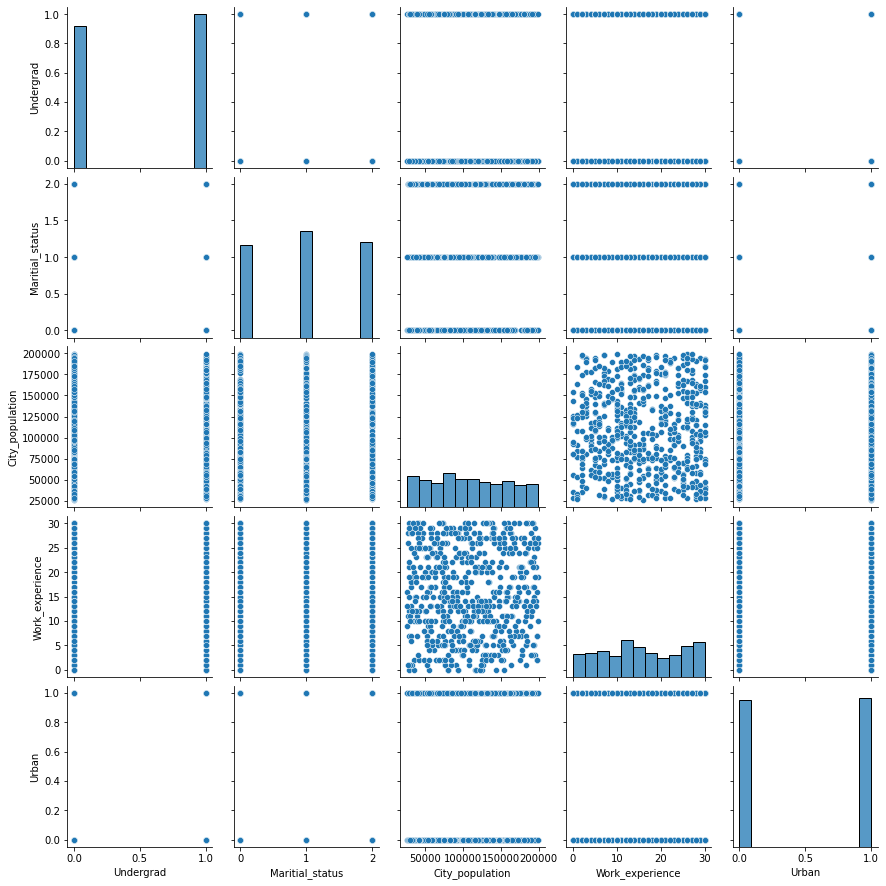

In [17]:
plt.figure(figsize=(8,8))
sns.pairplot(data2, palette='coolwarm')
plt.show()

<AxesSubplot:>

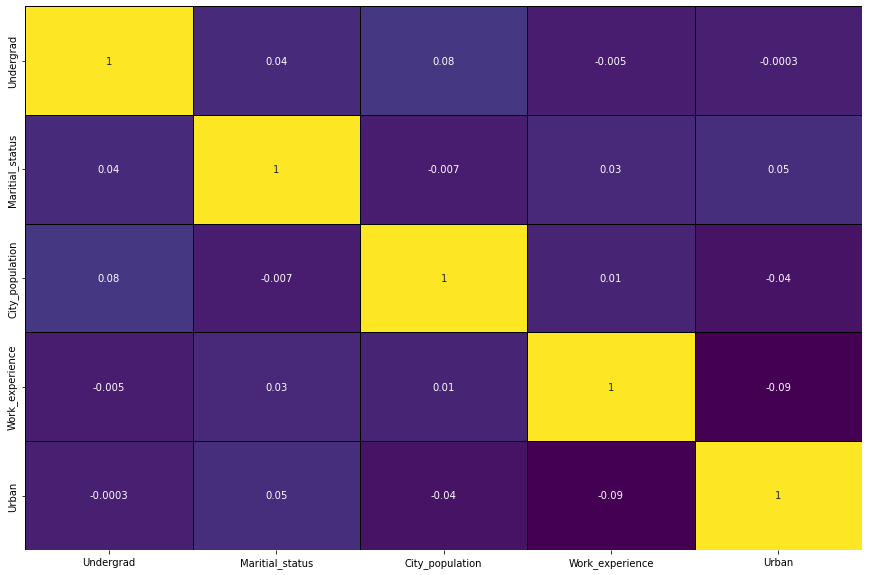

In [18]:

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data2.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')

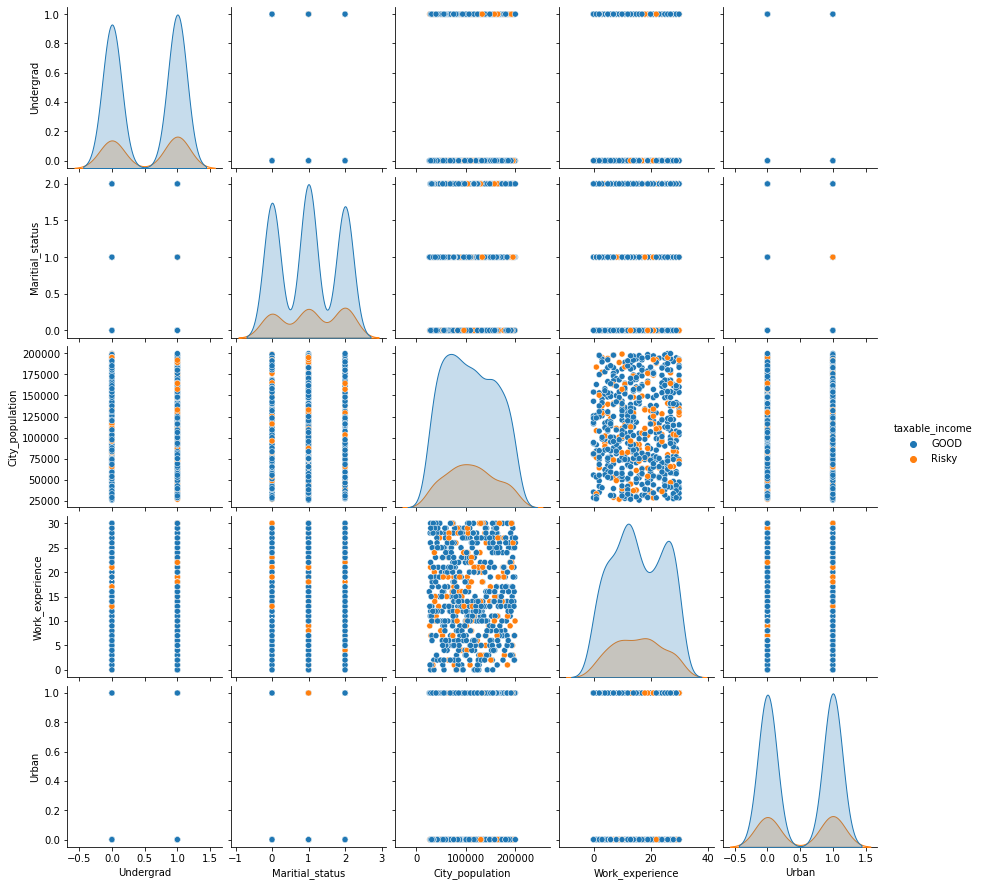

In [19]:
import seaborn as sns
sns.pairplot(data=data2, hue = 'taxable_income')

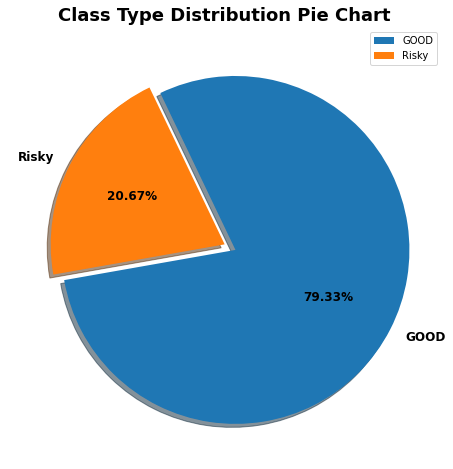

In [20]:
plt.figure(figsize = (12,8))
plt.pie(data2['taxable_income'].value_counts(),
       labels=data2.taxable_income.unique(),
       explode = [0.07,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

In [21]:
# input variables 
X  = data2.iloc[:,0:5]
X

,Undergrad,Maritial_status,City_population,Work_experience,Urban
0,0,1,50047,10,1
1,1,0,134075,18,1
2,0,2,160205,30,1
3,1,1,193264,15,1
4,0,2,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,2,180083,17,0


In [22]:
# Target variables
Y = data2.iloc[:,5]
Y

0      GOOD
1      GOOD
2      GOOD
3      GOOD
4      GOOD
       ... 
595    GOOD
596    GOOD
597    GOOD
598    GOOD
599    GOOD
Name: taxable_income, Length: 600, dtype: object

In [23]:
# splitting the data into train and test split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.33,random_state = 2)

In [24]:
# Builfing a model or creating a model
RD = RandomForestClassifier(n_estimators=100,max_features=3)
RD.fit(x_train,y_train)# fitting on train data

RandomForestClassifier(max_features=3)

In [25]:
predict = RD.predict(x_test)# predicting on data
np.mean(predict==y_test)*100  # accurcy on a test data

76.76767676767676

In [26]:
# actual vs predicted
df_t = pd.DataFrame({'Actual':y_test, 'Predicted':predict})
df_t

,Actual,Predicted
449,GOOD,GOOD
141,GOOD,Risky
131,GOOD,GOOD
311,GOOD,GOOD
176,GOOD,Risky
...,...,...
295,GOOD,GOOD
199,Risky,GOOD
69,GOOD,GOOD
14,GOOD,GOOD
